## Programming Exercise 2: Logistic Regression

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
SourcePath = "../coursera_ml_ipynb/ex2/"

### 1 Logistic Regression

In [63]:
datafile = SourcePath + 'data/ex2data1.txt'
#!head $datafile
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1, 2),
                  unpack=True)  #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size  # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X, 0, 1, axis=1)

#### 1.1 Visualizing the data

In [64]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(0,X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(0,X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
#print "Included everything? ",(len(pos)+len(neg) == X.shape[0])

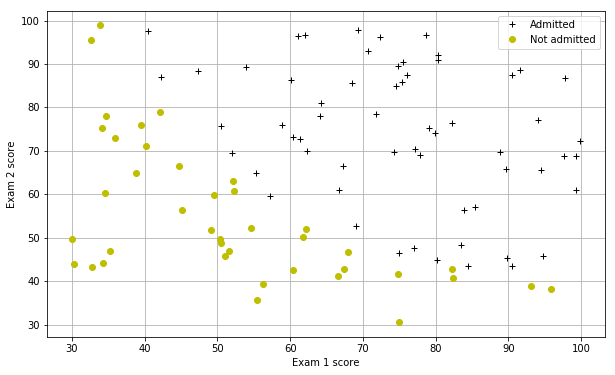

In [65]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

#### 1.2 Implementation

In [66]:
from scipy.special import expit #Vectorized sigmoid function

Text(0.5,1,'Woohoo this looks like a sigmoid function to me.')

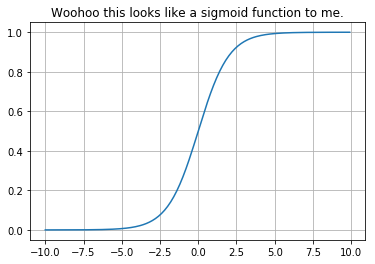

In [67]:
#Quick check that expit is what I think it is
myx = np.arange(-10,10,.1)
plt.plot(myx,expit(myx))
plt.title("Woohoo this looks like a sigmoid function to me.")
plt.grid(True)

In [68]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [69]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.6931471805599453

In [70]:
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]


In [71]:
theta, mincost = optimizeTheta(initial_theta,X,y)
#That's pretty cool. Black boxes ftw

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [72]:
#"Call your costFunction function using the optimal parameters of θ. 
#You should see that the cost is about 0.203."
print (computeCost(theta,X,y))

0.2034977015902151


array([-25.16130062,   0.20623142,   0.20147143])

array([30.05882245, 99.8278578 ])

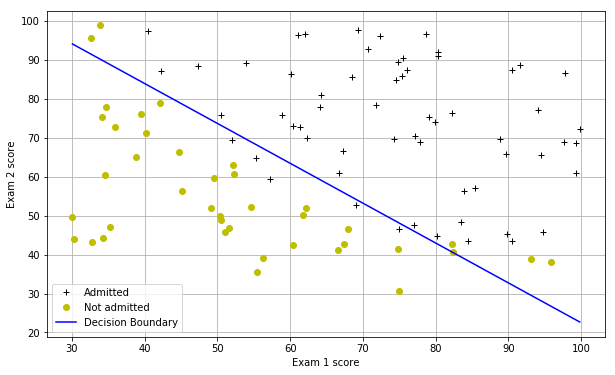

In [73]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)
theta
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_xs
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [74]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print (h(theta,np.array([1, 45.,85.])))

0.7762915904112411


In [75]:
def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

theta
#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta,pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot
print ("Fraction of training samples correctly predicted: %f." % prcnt_correct)

array([-25.16130062,   0.20623142,   0.20147143])

Fraction of training samples correctly predicted: 0.890000.


### 2 Regularized Logistic Regression

#### 2.1 Visualizing the data

In [106]:
datafile = SourcePath + 'data/ex2data2.txt'
#!head $datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [107]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(0,X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(0,X.shape[0]) if y[i] == 0])
#Check to make sure I included all entries
#print "Included everything? ",(len(pos)+len(neg) == X.shape[0])

<Figure size 432x432 with 0 Axes>

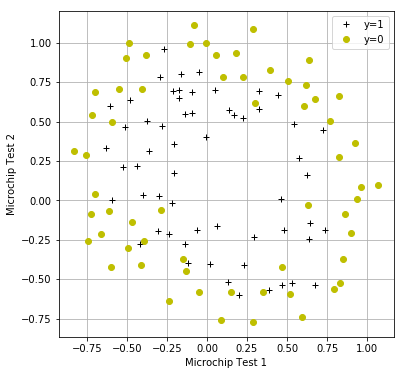

In [108]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)
    
#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

#### 2.2 Feature mapping

In [143]:
def mapFeature(x1col, x2col):
    degree = 6
    result = np.ones((x1col.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            if i==j & i==0 & j==0:
                continue
            temp1 = x1col**(i-j)
            temp2 = x2col**j
            re = (temp1 * temp2).reshape((x1col.shape[0], 1))
            result = np.hstack((result,re))
    return result

resultX = mapFeature(X[:,1],X[:,2])
resultX

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

#### 2.3 Cost function and gradient

In [120]:
from scipy import optimize

In [154]:
def gradient(X,
             y,
             alpha,
             iter_num,
             theta_start=np.zeros((resultX.shape[1], 1)),
             lamb=0):
    theta = theta_start
    for i in range(0, iter_num):
        derta = h(theta, X) - y
        theta = theta - (float)(alpha / m) * (np.dot(X.T, derta) + lamb * theta)
    return theta


def optimizeRegularizedTheta(mytheta, myX, myy, mylambda=0.):
    result = optimize.minimize(computeCost,
                               mytheta,
                               args=(myX, myy, mylambda),
                               method='BFGS',
                               options={
                                   "maxiter": 500,
                                   "disp": False
                               })
    return np.array([result.x]).T, result.fun


def computeCost(mytheta, myX, myy, mylambda=0.):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T, np.log(h(mytheta, myX)))
    term2 = np.dot((1 - np.array(myy)).T, np.log(1 - h(mytheta, myX)))
    regterm = (mylambda / 2) * np.sum(np.dot(mytheta[1:].T,
                                             mytheta[1:]))  #Skip theta0
    return float((1. / m) * (np.sum(term1 - term2) + regterm))


alpha = 0.1
iter_num = 2000000
initial_theta = np.zeros((resultX.shape[1], 1))
decision_theta = gradient(resultX, y, alpha, iter_num,np.zeros((resultX.shape[1], 1)), 0.)
# decision_theta, fun = optimizeRegularizedTheta(initial_theta, resultX, y)
computeCost(decision_theta, resultX, y)
decision_theta

0.2733641835056233

array([[   3.18559077],
       [  -0.869425  ],
       [   1.58061696],
       [ -20.0324198 ],
       [  -9.53967391],
       [   6.82010721],
       [  -1.7479412 ],
       [  20.54124855],
       [  35.51510733],
       [   8.91798995],
       [  78.23397737],
       [  20.99259661],
       [   2.86597943],
       [  -8.83604803],
       [ -40.45085195],
       [  20.90520256],
       [ -11.90797082],
       [ -19.4138392 ],
       [ -19.2664377 ],
       [ -15.60505242],
       [  11.0444539 ],
       [-115.36289903],
       [ -58.26249104],
       [ -16.3080984 ],
       [  42.11483118],
       [ -77.46081028],
       [ -52.92853769],
       [   2.6929547 ]])

##### 2.3.1 Learning parameters using fminunc

#### 2.4 Plotting the decision boundary

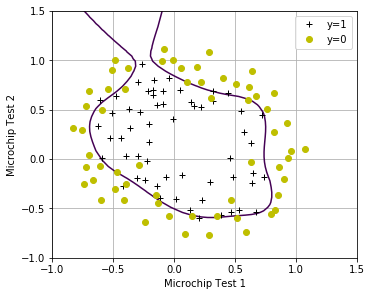

In [155]:
def plotBoundary(mytheta,mylambda=0):
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(0,len(xvals)):
        for j in range(0,len(yvals)):
            tempx = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(tempx,mytheta)
    zvals = zvals.transpose()
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    plotData()
    plt.contour(xvals,yvals,zvals,[0])

plotBoundary(decision_theta,0)